## TP1 Time Series

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# path= kagglehub.dataset_download('erogluegemen/airline-passengers')
# print("path to dataset files",path)

### Telechargmeent du dataset
<p> Utilisation de l'API kaggle pour éviter les problemes de path lié a kagglehub </p>

In [30]:
project_dir = os.getcwd()
!kaggle datasets download -d erogluegemen/airline-passengers -p "{project_dir}" --unzip

Dataset URL: https://www.kaggle.com/datasets/erogluegemen/airline-passengers
License(s): apache-2.0




  0%|          | 0.00/807 [00:00<?, ?B/s]
100%|██████████| 807/807 [00:00<?, ?B/s] 


### Visualisation du dataset

In [ ]:
df = pd.read_csv('airline-passengers.csv')
df.head()
print(df.head())
print("\nDataset shape:", df.shape)


     month  total_passengers
0  1949-01               112
1  1949-02               118
2  1949-03               132
3  1949-04               129
4  1949-05               121

Dataset shape: (144, 2)


### Transformation en index temporel

In [ ]:
df["month"] = pd.to_datetime(df["month"])
df.set_index("month", inplace=True)


### Visualisation de la serie

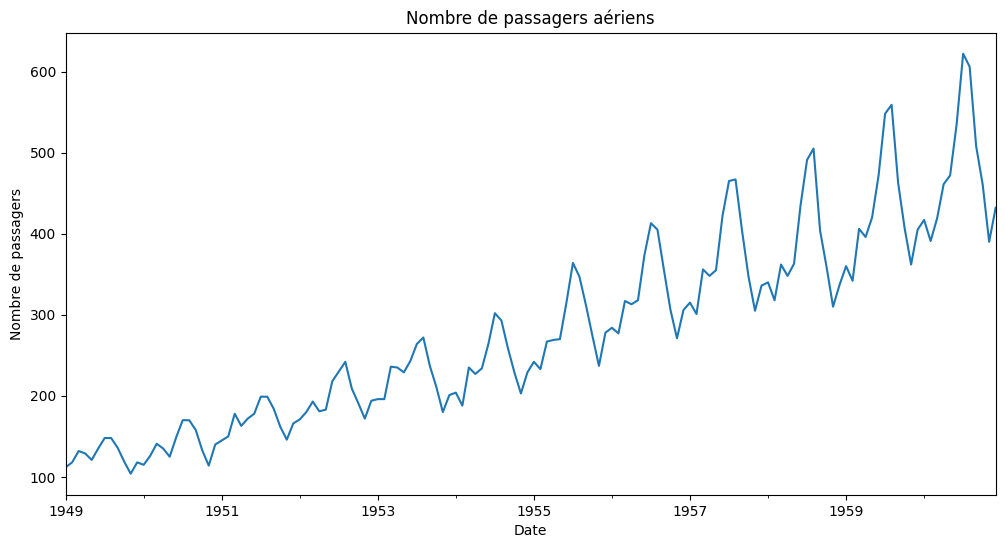

In [23]:
df['total_passengers'].plot(figsize=(12,6), title="Nombre de passagers aériens")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.show()

### Calcule de la moyenne mobile

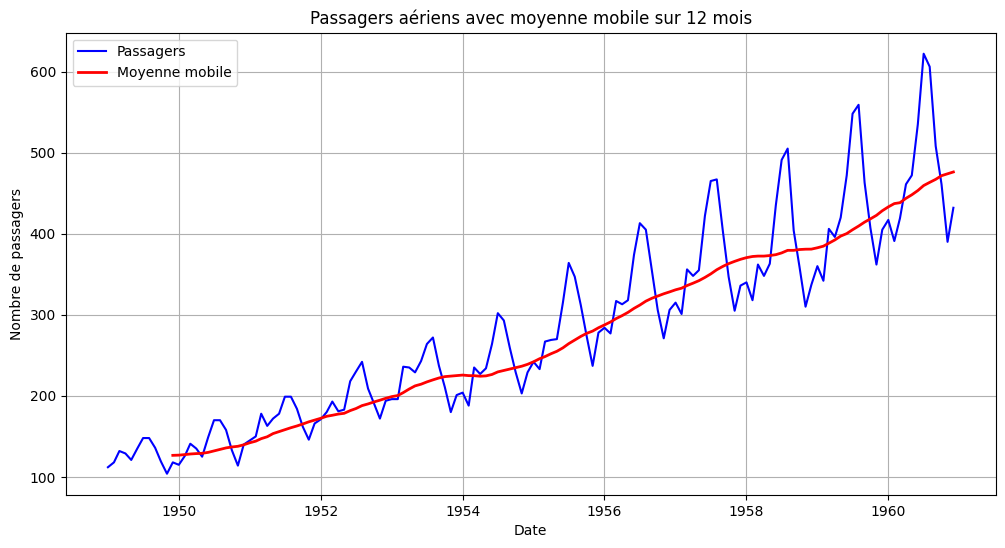

In [ ]:
df['MA12'] = df['total_passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['total_passengers'], label='Passagers', color='blue')
plt.plot(df.index, df['MA12'], label='Moyenne mobile', color='red', linewidth=2)
plt.title("Passagers aériens avec moyenne mobile sur 12 mois")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.legend()
plt.grid(True)
plt.show()

### Décomposition de la série

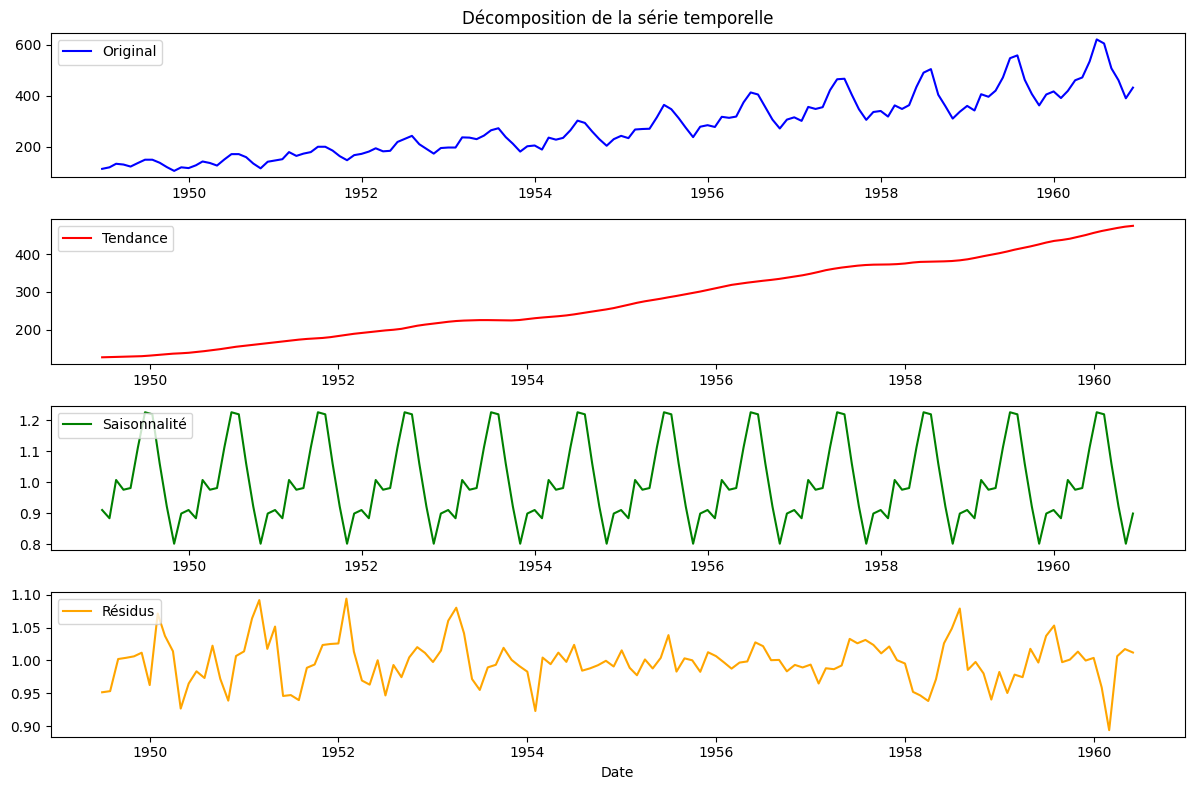

In [27]:
decomposition = seasonal_decompose(df['total_passengers'], model='multiplicative', period=12)

# Récupération des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisation
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(df['total_passengers'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Décomposition de la série temporelle')

plt.subplot(4,1,2)
plt.plot(trend, label='Tendance', color='red')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Saisonnalité', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Résidus', color='orange')
plt.legend(loc='upper left')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
#from networkx to ipcytoscape python to have un graphe interactive